In [5]:
import requests
import prepare
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [2]:
# get URL
pumpkin = requests.get("https://en.wikipedia.org/wiki/Halloween")
 
# display status code
print(pumpkin.status_code)
 
# display scrapped data
print(pumpkin.content)

# store content into variable
pumpkin_text = BeautifulSoup(pumpkin.content, 'html.parser').text

200
b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Halloween - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"81623c4b-b7a0-407e-bbb4-bdd31b2c43d5","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Halloween","wgTitle":"Halloween","wgCurRevisionId":1119300694,"wgRevisionId":1119300694,"wgArticleId":13855,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","CS1: long volume value","CS1 German-language sources (de)","Wikipedia articles incorporating a citation from the 1911 Encyc

In [3]:
# use function to clean text
pumpkin_text = prepare.clean(pumpkin_text)

In [10]:
# Importing mask
pumpkin_mask = np.array(Image.open('./pumpkin.jpeg'))

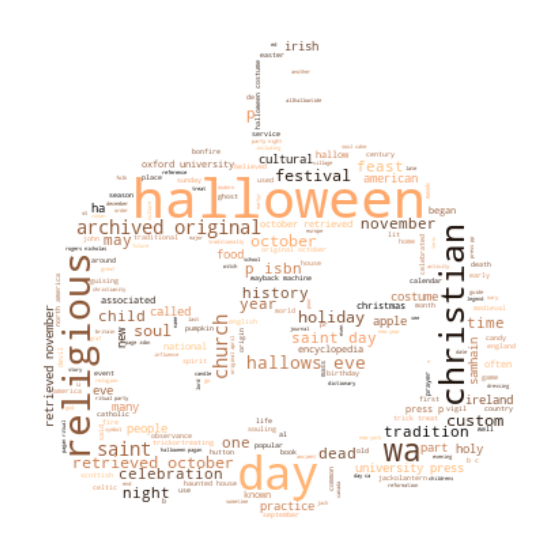

In [15]:
# Plot the wordcloud with the mask applied
wc = WordCloud(background_color='white', mask= pumpkin_mask, colormap = 'copper').generate(pumpkin_text)
plt.figure(figsize=[10,10])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()